In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | asau
Processing Record 3 of Set 1 | hihifo
City not found. Skipping...
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | grants pass
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | biak
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | mayo
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | khonuu
City not found. Skipping...
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | tilichiki
Processing Record 17 of Set 1 | port elizabeth
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | avera
Processing Record 21 of Set 1 | abu samrah
Processing 

Processing Record 37 of Set 4 | codrington
Processing Record 38 of Set 4 | tuatapere
Processing Record 39 of Set 4 | matagami
Processing Record 40 of Set 4 | aksarka
Processing Record 41 of Set 4 | kapit
Processing Record 42 of Set 4 | turukhansk
Processing Record 43 of Set 4 | vysokogornyy
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | nikolskoye
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 48 of Set 4 | buala
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | villa rica
Processing Record 2 of Set 5 | kambove
Processing Record 3 of Set 5 | east london
Processing Record 4 of Set 5 | komsomolskiy
Processing Record 5 of Set 5 | netivot
Processing Record 6 of Set 5 | abay
Processing Record 7 of Set 5 | naryan-mar
Processing Record 8 of Set 5 | kloulklubed
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of S

Processing Record 28 of Set 8 | severo-kurilsk
Processing Record 29 of Set 8 | yate
Processing Record 30 of Set 8 | cascais
Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | joshimath
Processing Record 33 of Set 8 | port antonio
Processing Record 34 of Set 8 | dukat
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | gravdal
Processing Record 37 of Set 8 | cine
Processing Record 38 of Set 8 | yar-sale
Processing Record 39 of Set 8 | bulaevo
Processing Record 40 of Set 8 | sinnamary
Processing Record 41 of Set 8 | henzada
City not found. Skipping...
Processing Record 42 of Set 8 | araxa
Processing Record 43 of Set 8 | meyungs
City not found. Skipping...
Processing Record 44 of Set 8 | cassia
Processing Record 45 of Set 8 | sabzevar
Processing Record 46 of Set 8 | tura
Processing Record 47 of Set 8 | bolilao
Processing Record 48 of Set 8 | sambava
Processing Record 49 of Set 8 | vao
Processing Record 50 of Set 8 | e

Processing Record 16 of Set 12 | laguna
Processing Record 17 of Set 12 | svetlyy
Processing Record 18 of Set 12 | bam
Processing Record 19 of Set 12 | harper
Processing Record 20 of Set 12 | mrirt
City not found. Skipping...
Processing Record 21 of Set 12 | ushirombo
Processing Record 22 of Set 12 | paamiut
Processing Record 23 of Set 12 | doische
Processing Record 24 of Set 12 | soyo
Processing Record 25 of Set 12 | oudtshoorn
Processing Record 26 of Set 12 | luangwa
Processing Record 27 of Set 12 | aswan
Processing Record 28 of Set 12 | byron bay
Processing Record 29 of Set 12 | port hueneme
Processing Record 30 of Set 12 | entre rios
Processing Record 31 of Set 12 | dillon
Processing Record 32 of Set 12 | port blair
Processing Record 33 of Set 12 | samarai
Processing Record 34 of Set 12 | kununurra
Processing Record 35 of Set 12 | beruni
City not found. Skipping...
Processing Record 36 of Set 12 | luwuk
Processing Record 37 of Set 12 | camalu
Processing Record 38 of Set 12 | maracai

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.1203,-134.9692,75.11,75,100,6.71,PF,2022-04-23 13:16:11
1,Asau,46.4333,26.4000,54.52,58,94,9.64,RO,2022-04-23 13:16:12
2,Vaini,-21.2000,-175.2000,68.16,100,20,3.44,TO,2022-04-23 13:16:12
3,Grants Pass,42.4390,-123.3284,42.48,92,75,0.00,US,2022-04-23 13:16:13
4,Barrow,71.2906,-156.7887,15.82,79,100,6.91,US,2022-04-23 13:16:13
5,Albany,42.6001,-73.9662,45.34,53,32,1.01,US,2022-04-23 13:13:48
6,Biak,-0.9131,122.8766,77.79,86,100,2.10,ID,2022-04-23 13:16:13
7,Bluff,-46.6000,168.3333,52.81,89,100,28.19,NZ,2022-04-23 13:16:14
8,Mayo,38.8876,-76.5119,61.66,59,0,8.05,US,2022-04-23 13:16:14
9,Punta Arenas,-53.1500,-70.9167,44.71,87,75,13.80,CL,2022-04-23 13:12:03


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2022-04-23 13:16:11,-23.1203,-134.9692,75.11,75,100,6.71
1,Asau,RO,2022-04-23 13:16:12,46.4333,26.4000,54.52,58,94,9.64
2,Vaini,TO,2022-04-23 13:16:12,-21.2000,-175.2000,68.16,100,20,3.44
3,Grants Pass,US,2022-04-23 13:16:13,42.4390,-123.3284,42.48,92,75,0.00
4,Barrow,US,2022-04-23 13:16:13,71.2906,-156.7887,15.82,79,100,6.91
5,Albany,US,2022-04-23 13:13:48,42.6001,-73.9662,45.34,53,32,1.01
6,Biak,ID,2022-04-23 13:16:13,-0.9131,122.8766,77.79,86,100,2.10
7,Bluff,NZ,2022-04-23 13:16:14,-46.6000,168.3333,52.81,89,100,28.19
8,Mayo,US,2022-04-23 13:16:14,38.8876,-76.5119,61.66,59,0,8.05
9,Punta Arenas,CL,2022-04-23 13:12:03,-53.1500,-70.9167,44.71,87,75,13.80


In [8]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

PermissionError: [Errno 13] Permission denied: 'cities.csv'

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

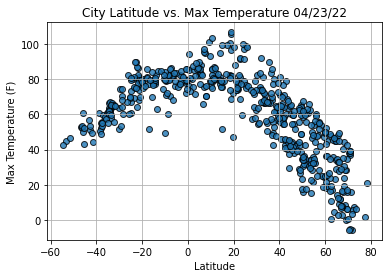

In [10]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Fig1.png")

# Show plot.
plt.show()

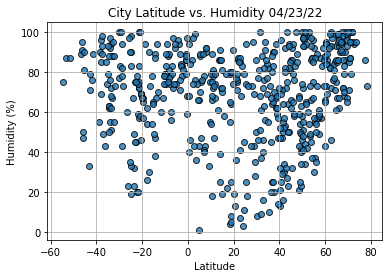

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig2.png")
# Show plot.
plt.show()

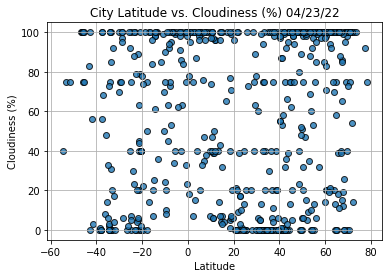

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig3.png")
# Show plot.
plt.show()

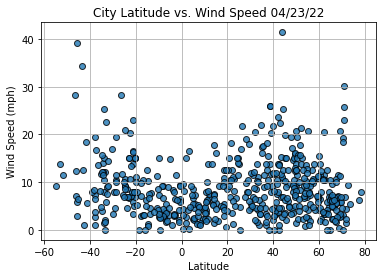

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Fig4.png")
# Show plot.
plt.show()

In [14]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Asau,RO,2022-04-23 13:16:12,46.4333,26.4000,54.52,58,94,9.64
3,Grants Pass,US,2022-04-23 13:16:13,42.4390,-123.3284,42.48,92,75,0.00
4,Barrow,US,2022-04-23 13:16:13,71.2906,-156.7887,15.82,79,100,6.91
5,Albany,US,2022-04-23 13:13:48,42.6001,-73.9662,45.34,53,32,1.01
8,Mayo,US,2022-04-23 13:16:14,38.8876,-76.5119,61.66,59,0,8.05
...,...,...,...,...,...,...,...,...,...
538,Camalu,MX,2022-04-23 13:29:40,30.8500,-116.0667,54.88,81,0,5.03
539,Maracaibo,VE,2022-04-23 13:29:40,10.6317,-71.6406,75.18,89,100,1.92
541,Kashi,CN,2022-04-23 13:29:40,39.4547,75.9797,78.01,14,0,4.47
544,Turbat,PK,2022-04-23 13:29:41,26.0023,63.0440,98.10,18,100,16.87


In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

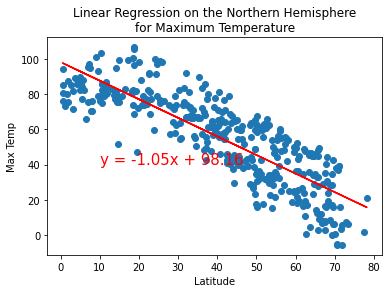

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

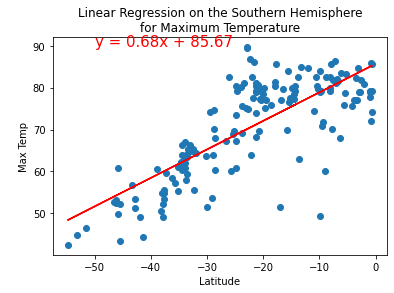

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', '\nMax Temp',(-50,90))

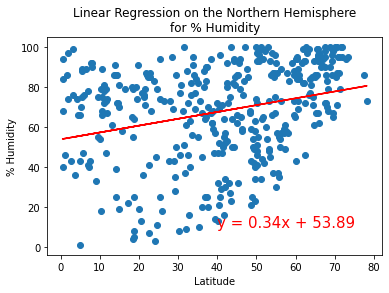

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', '% Humidity',(40,10))

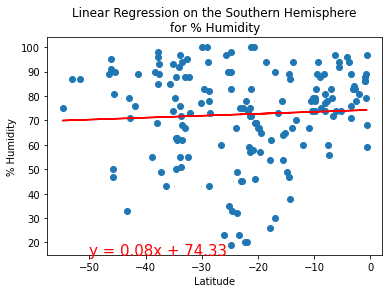

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Humidity', '% Humidity',(-50,15))

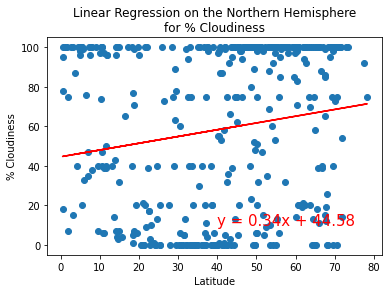

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Cloudiness', '% Cloudiness',(40,10))

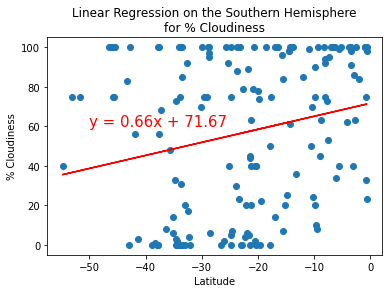

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor % Cloudiness', '% Cloudiness',(-50,60))

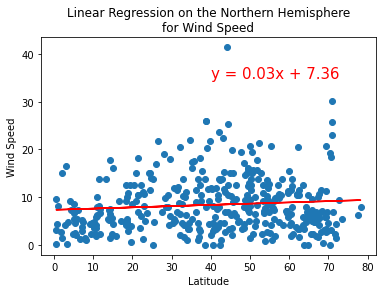

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

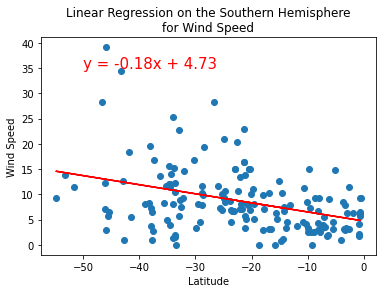

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Wind Speed', 'Wind Speed',(-50,35))